# Final Project: Regression Analysis

**Author:** James Pinkston<br>
**Date:** November 25, 2025

**Introduction:** This project will demonstrate regression modeling techniques using a real-world dataset to predict insurance charges based on age, BMI, and smoking status.

Data Source:  [Medical Costs Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

The following will be covered in this project:

- Load and explore a dataset.
- Choose and justify features for predicting a target variable.
- Train a regression model and evaluate performance.
- Compare multiple regression approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate's project.

### Import External Python Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [ ]:
# Load the insurance Dataset
insurance_df = pd.read_csv("../data/insurance.csv")

# Display the first 10 rows
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 1.2 Check for missing values and display summary statistics

In [ ]:
# Check for missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Display summary statistics
print(insurance_df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Reflection 1

What do you notice about the dataset? Are there any data issues?  **<span style="color: darkgreen">There are 7 columns (age, sex, bmi, children, smoker, region, charges) and none of the columns have any missing data.</span>**

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

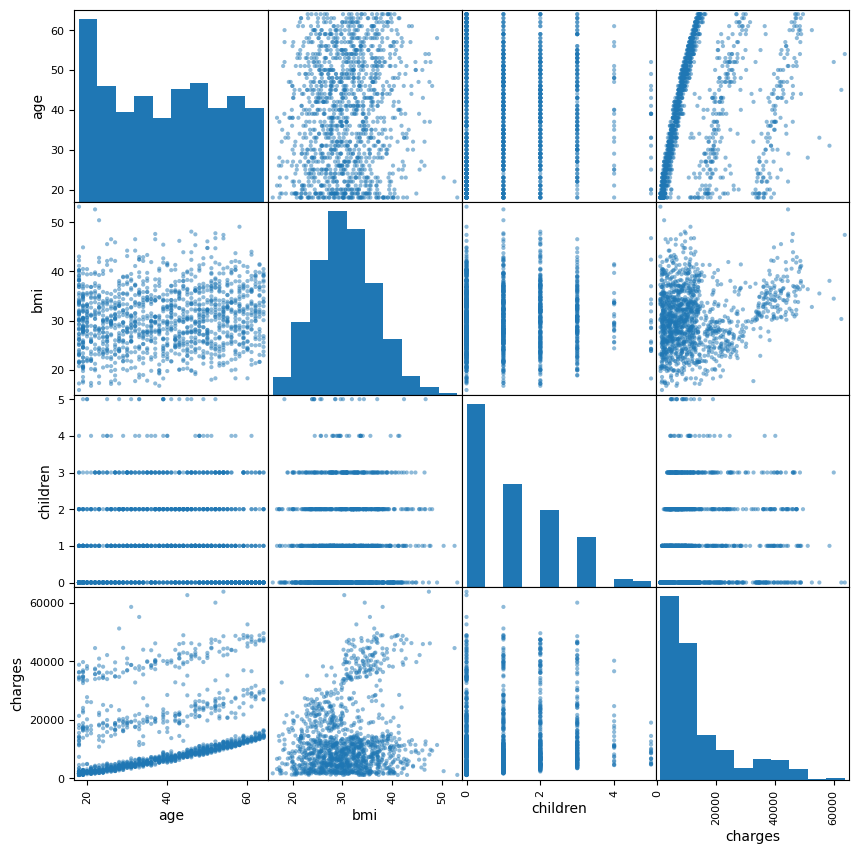

In [ ]:
# Create a scatter matrix using only numeric attributes
attributes = ["age", "bmi", "children", "charges"]
scatter_matrix(insurance_df[attributes], figsize=(10, 10))

Text(0.5, 1.0, 'Violin Plot of Age')

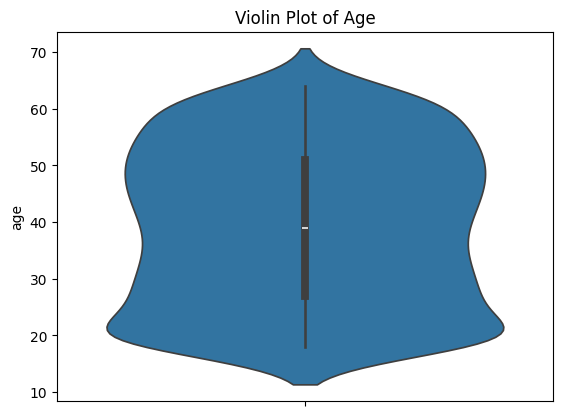

In [ ]:
# Create a violin plot of age
sns.violinplot(y="age", data=insurance_df)
plt.title("Violin Plot of Age")

Text(0.5, 1.0, 'Violin Plot of BMI')

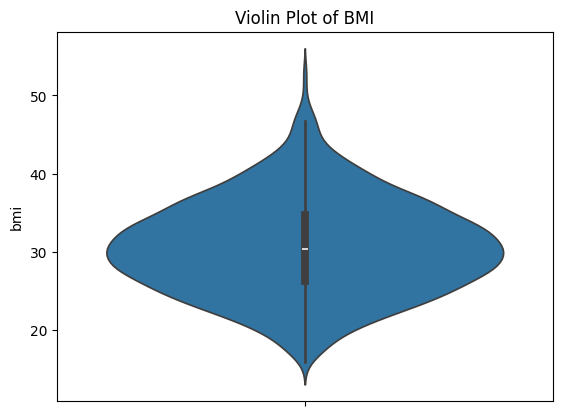

In [ ]:
# Create a violin plot of bmi
sns.violinplot(y="bmi", data=insurance_df)
plt.title("Violin Plot of BMI")

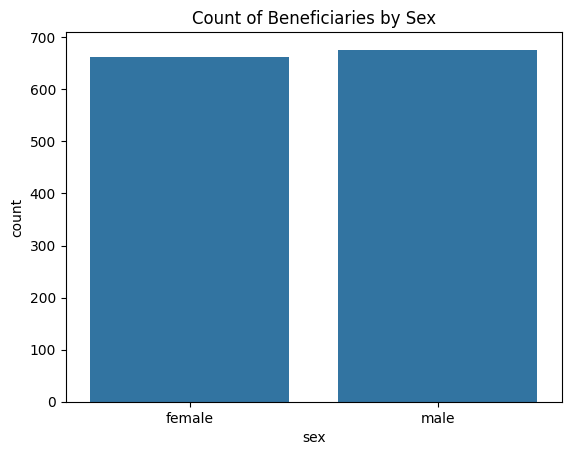

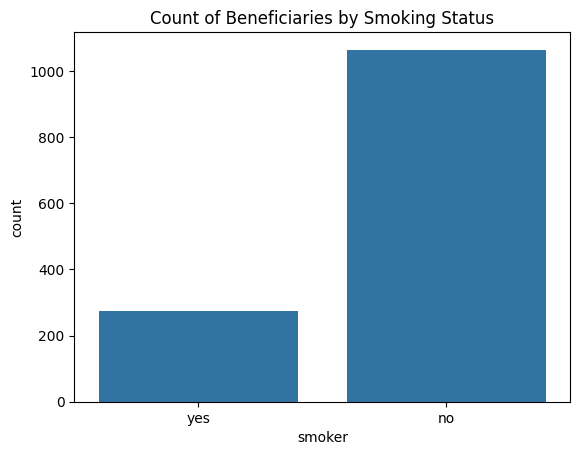

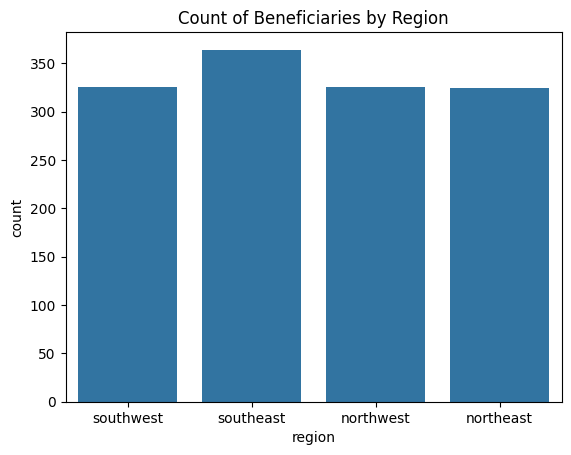

In [ ]:
# Count plot for sex
sns.countplot(x="sex", data=insurance_df)
plt.title("Count of Beneficiaries by Sex")
plt.show()

# Count plots for smoker
sns.countplot(x="smoker", data=insurance_df)
plt.title("Count of Beneficiaries by Smoking Status")
plt.show()

# Count plots for region
sns.countplot(x="region", data=insurance_df)
plt.title("Count of Beneficiaries by Region")
plt.show()

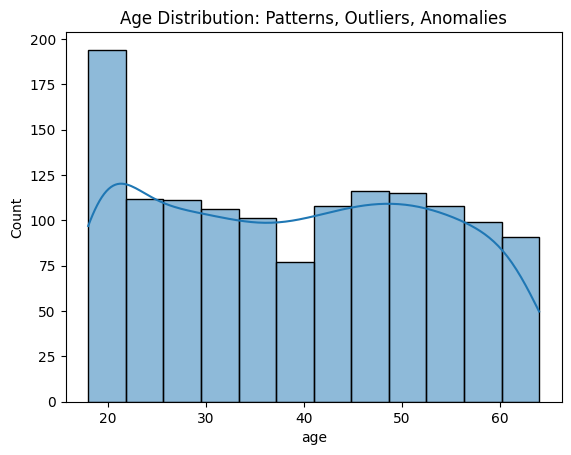

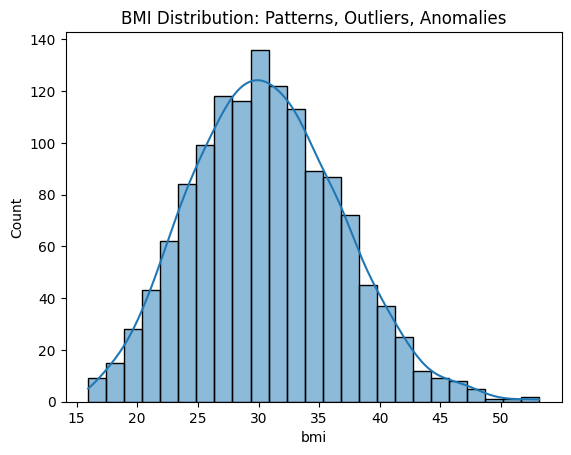

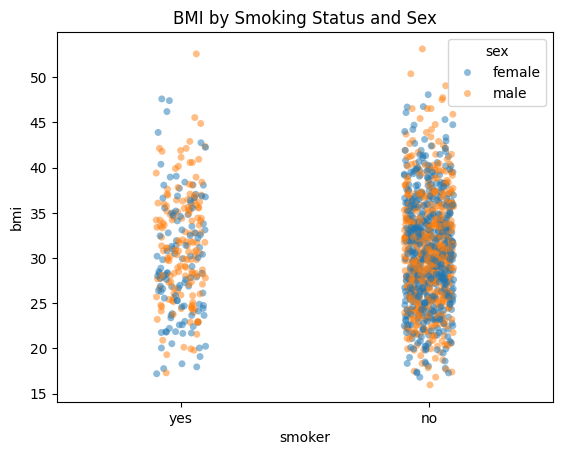

In [ ]:
# Identify patterns, outliers, and anomalies in feature distributions.

# age
sns.histplot(insurance_df["age"], kde=True)
plt.title("Age Distribution: Patterns, Outliers, Anomalies")
plt.show()

# bmi
sns.histplot(insurance_df["bmi"], kde=True)
plt.title("BMI Distribution: Patterns, Outliers, Anomalies")
plt.show()

# smoking status
sns.stripplot(x="smoker", y="bmi", hue="sex", data=insurance_df, jitter=True, alpha=0.5)
plt.title("BMI by Smoking Status and Sex")
plt.show()

Text(0, 0.5, 'Frequency')

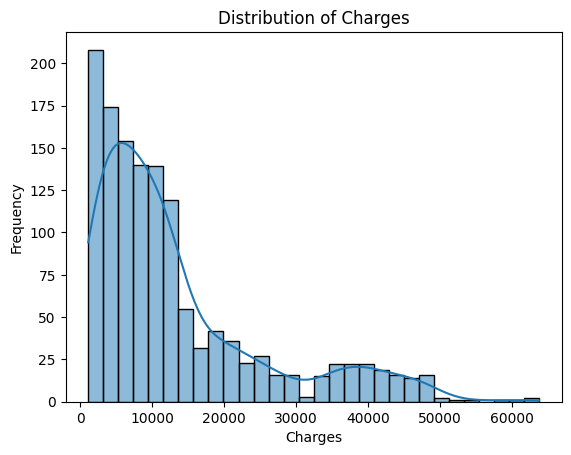

In [ ]:
# Check for frequency of charges
sns.histplot(insurance_df["charges"], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")

### 2.2 Handle missing values and clean data

In [ ]:
# Convert categorical data to numeric data
insurance_df["sex"] = insurance_df["sex"].map({"male": 0, "female": 1})
insurance_df["smoker"] = insurance_df["smoker"].map({"no": 0, "yes": 1})
insurance_df["region"] = insurance_df["region"].map({"northwest": 0, "northeast": 1, "southwest": 2, "southeast": 3})

### Reflection 2

What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?  **<span style="color: darkgreen">Distribution of beneficiaries by sex is nearly even. There are exponentially more non-smokers than smokers. The majority of beneficiaries are in their early 20s. The majority of beneficiaries have a BMI between 25 and 35. The majority of insurance charges are less than $12,000. There are no significant anomalies and no missing data. I did not create any new features; however, I did convert the categorical features of sex, smoker, and region to numerical.</span>**

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

- Select two or more input features
  - Input Features:  age, bmi, smoker (smoking status)
- Select a target variable
  - Target Feature:  Charges (Regression) - a continuous target variable

- Justify your selection with reasoning
  - age:  Medical costs tend to increase with age due to a higher liklihood of illness. Age is one of the strongest demographic predictors of insurance expenses.
  - bmi (body mass index):  BMI is an approximate measure of body fat and is commonly used in health-risk assessments. BMI provides a continuous numeric variable that correlates with insurance risk.
  - smoker (smoking status):  Smoking is one of the most influential risk factors affecting health insurance charges. Smoking status is a valuable categorical feature for improving model performance.
  - charges:  As a continuous numerical variable, charges is ideal for regression modeling.

### 3.2 Define X and y

In [ ]:
# Select multiple input features
X = insurance_df[["age", "bmi", "smoker"]]

# Select the target variable
y = insurance_df["charges"]

### Reflection 3

Why did you choose these features? How might they impact predictions or accuracy?  **<span style="color: darkgreen">I selected age, bmi, and smoker (smoking status) because they have clear, well-documented relationships with medical costs and represent meaningful predictors of insurance charges.</span>**

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training Set: (1070, 3) (1070,)
Test Set: (268, 3) (268,)


### 4.2 Train model using Scikit-Learn model.fit() method

In [ ]:
lr_model_train = LinearRegression().fit(X_train, y_train)

### 4.3 Evaluate and Report performance

In [ ]:
# Predictions
y_pred_train = lr_model_train.predict(X_train)
y_pred_test = lr_model_train.predict(X_test)

# Evaluate
print("Training R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Training R^2: 0.7392286795956207
Test R^2: 0.7776932310583375
Test RMSE: 5874.763304187488
Test MAE: 4260.560091099391


### Reflection 4

How well did the model perform? Any surprises in the results?  **<span style="color: darkgreen">The model performed quite well with a Training R^2 of 0.739 and a Test R^2 of 0.778. The MAE of 4260.56 and RMSE of 5874.76 indicate that predictions are generally close to actual charges. The Test R^2 being slightly higher than the Training R^2 is a bit of a surprise and indicates that the model generalizes well and is not overfitting.</span>**

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

In [ ]:
# Pipeline 1
pipeline_ss = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("linear_regression", LinearRegression())
])

# Fit pipeline on training data
pipeline_ss.fit(X_train, y_train)

# Predictions
y_pred_train_p1 = pipeline_ss.predict(X_train)
y_pred_test_p1 = pipeline_ss.predict(X_test)

# Evaluate
print("Pipeline 1 - Training R^2:", r2_score(y_train, y_pred_train_p1))
print("Pipeline 1 - Test R^2:", r2_score(y_test, y_pred_test_p1))
print("Pipeline 1 - Test RMSE:", root_mean_squared_error(y_test, y_pred_test_p1))
print("Pipeline 1 - Test MAE:", mean_absolute_error(y_test, y_pred_test_p1))

Pipeline 1 - Training R^2: 0.7392286795956206
Pipeline 1 - Test R^2: 0.7776932310583375
Pipeline 1 - Test RMSE: 5874.763304187488
Pipeline 1 - Test MAE: 4260.560091099391


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

In [ ]:
# Pipeline 2
pipeline_pf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linear_regression", LinearRegression())
])

# Fit pipeline on training data
pipeline_pf.fit(X_train, y_train)

# Predictions
y_pred_train_p2 = pipeline_pf.predict(X_train)
y_pred_test_p2 = pipeline_pf.predict(X_test)

# Evaluate
print("Pipeline 2 - Training R^2:", r2_score(y_train, y_pred_train_p2))
print("Pipeline 2 - Test R^2:", r2_score(y_test, y_pred_test_p2))
print("Pipeline 2 - Test RMSE:", root_mean_squared_error(y_test, y_pred_test_p2))
print("Pipeline 2 - Test MAE:", mean_absolute_error(y_test, y_pred_test_p2))

Pipeline 2 - Training R^2: 0.8356310098442372
Pipeline 2 - Test R^2: 0.8614998676151392
Pipeline 2 - Test RMSE: 4637.021658801298
Pipeline 2 - Test MAE: 2838.443408288153


### 5.3 Compare performance of all models across the same performance metrics

In [ ]:
def report(name, y_true, y_pred):
    print(f"{name} R^2: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y_test, y_pred_test)
report("Pipeline 1", y_test, y_pred_test_p1)
report("Pipeline 2", y_test, y_pred_test_p2)

Linear R^2: 0.778
Linear RMSE: 5874.76
Linear MAE: 4260.56

Pipeline 1 R^2: 0.778
Pipeline 1 RMSE: 5874.76
Pipeline 1 MAE: 4260.56

Pipeline 2 R^2: 0.861
Pipeline 2 RMSE: 4637.02
Pipeline 2 MAE: 2838.44



### Reflection 5

Which models performed better? How does scaling impact results?  **<span style="color: darkgreen">Pipeline 2, which included polynomial features, performed slightly better than the simple Linear Regression and Pipeline 1, achieving higher R^2 and lower errors. Scaling in Pipeline 1 had minimal impact on Linear Regression performance, which is expected because Linear Regression is not sensitive to feature magnitudes. Overall, adding polynomial features improved the model’s ability to capture non-linear relationships in the data, while scaling ensures numerical stability for future models.</span>**

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings

| Model Type                 | Features Used    | Train R^2 | Test R^2 | Test RMSE | Test MAE |
| -------------------------- | ---------------- | -------- | ------- | --------- | -------- |
| Linear Regression          | age, bmi, smoker | 0.739    | 0.778   | 5874.76   | 4260.56  |
| Pipeline 1 (StandardScaler)     | age, bmi, smoker | 0.739    | 0.778   | 5874.76   | 4260.56  |
| Pipeline 2 (Polynomial Features, degree=3) | age, bmi, smoker | 0.836    | 0.861   | 4637.02   | 2838.44  |

### 6.2 Discuss challenges faced

**<span style="color: darkgreen">This project, the final, has gone so much better than the mid-term. I did not really face any challenges, although implemented Pipeline 1 and Pipeline 2 took some extra time, as was expected.</span>**

### 6.3 If you had more time, what would you try next?

**<span style="color: darkgreen">I would try to add additional cases using a couple of other features, such as sex and region. I believe sex may have a meaningful impact on the prediction model, I do not believe that region would.</span>**

### Reflection 6:  What did you learn from this project?

**<span style="color: darkgreen">This project reinforced that age, BMI, and smoking status are strong predictors of insurance charges. The baseline Linear Regression and Pipeline 1 (StandardScaler) models performed nearly the same, showing that scaling alone does not significantly impact Linear Regression performance. Pipeline 2 (Polynomial Features) improved both training and test R^2 while lowering RMSE and MAE, indicating that capturing non-linear relationships can meaningfully improve model accuracy. Overall, I learned the importance of preprocessing, feature engineering, and carefully evaluating models to balance complexity and generalization.</span>**